In [219]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, kendalltau
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [220]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
boston_df = boston.frame

In [221]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [143]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

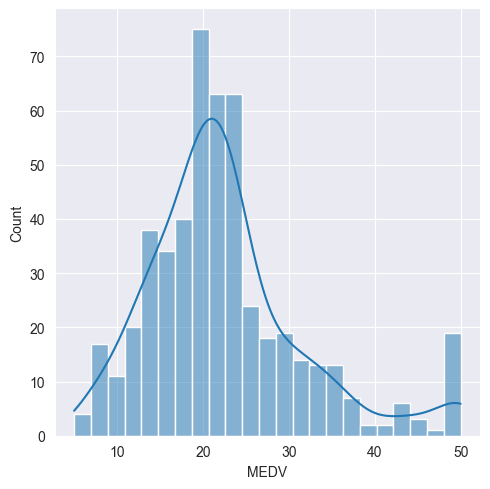

In [120]:
sns.displot(boston_df["MEDV"], kde=True)

We can clearly see strong skewness to the right

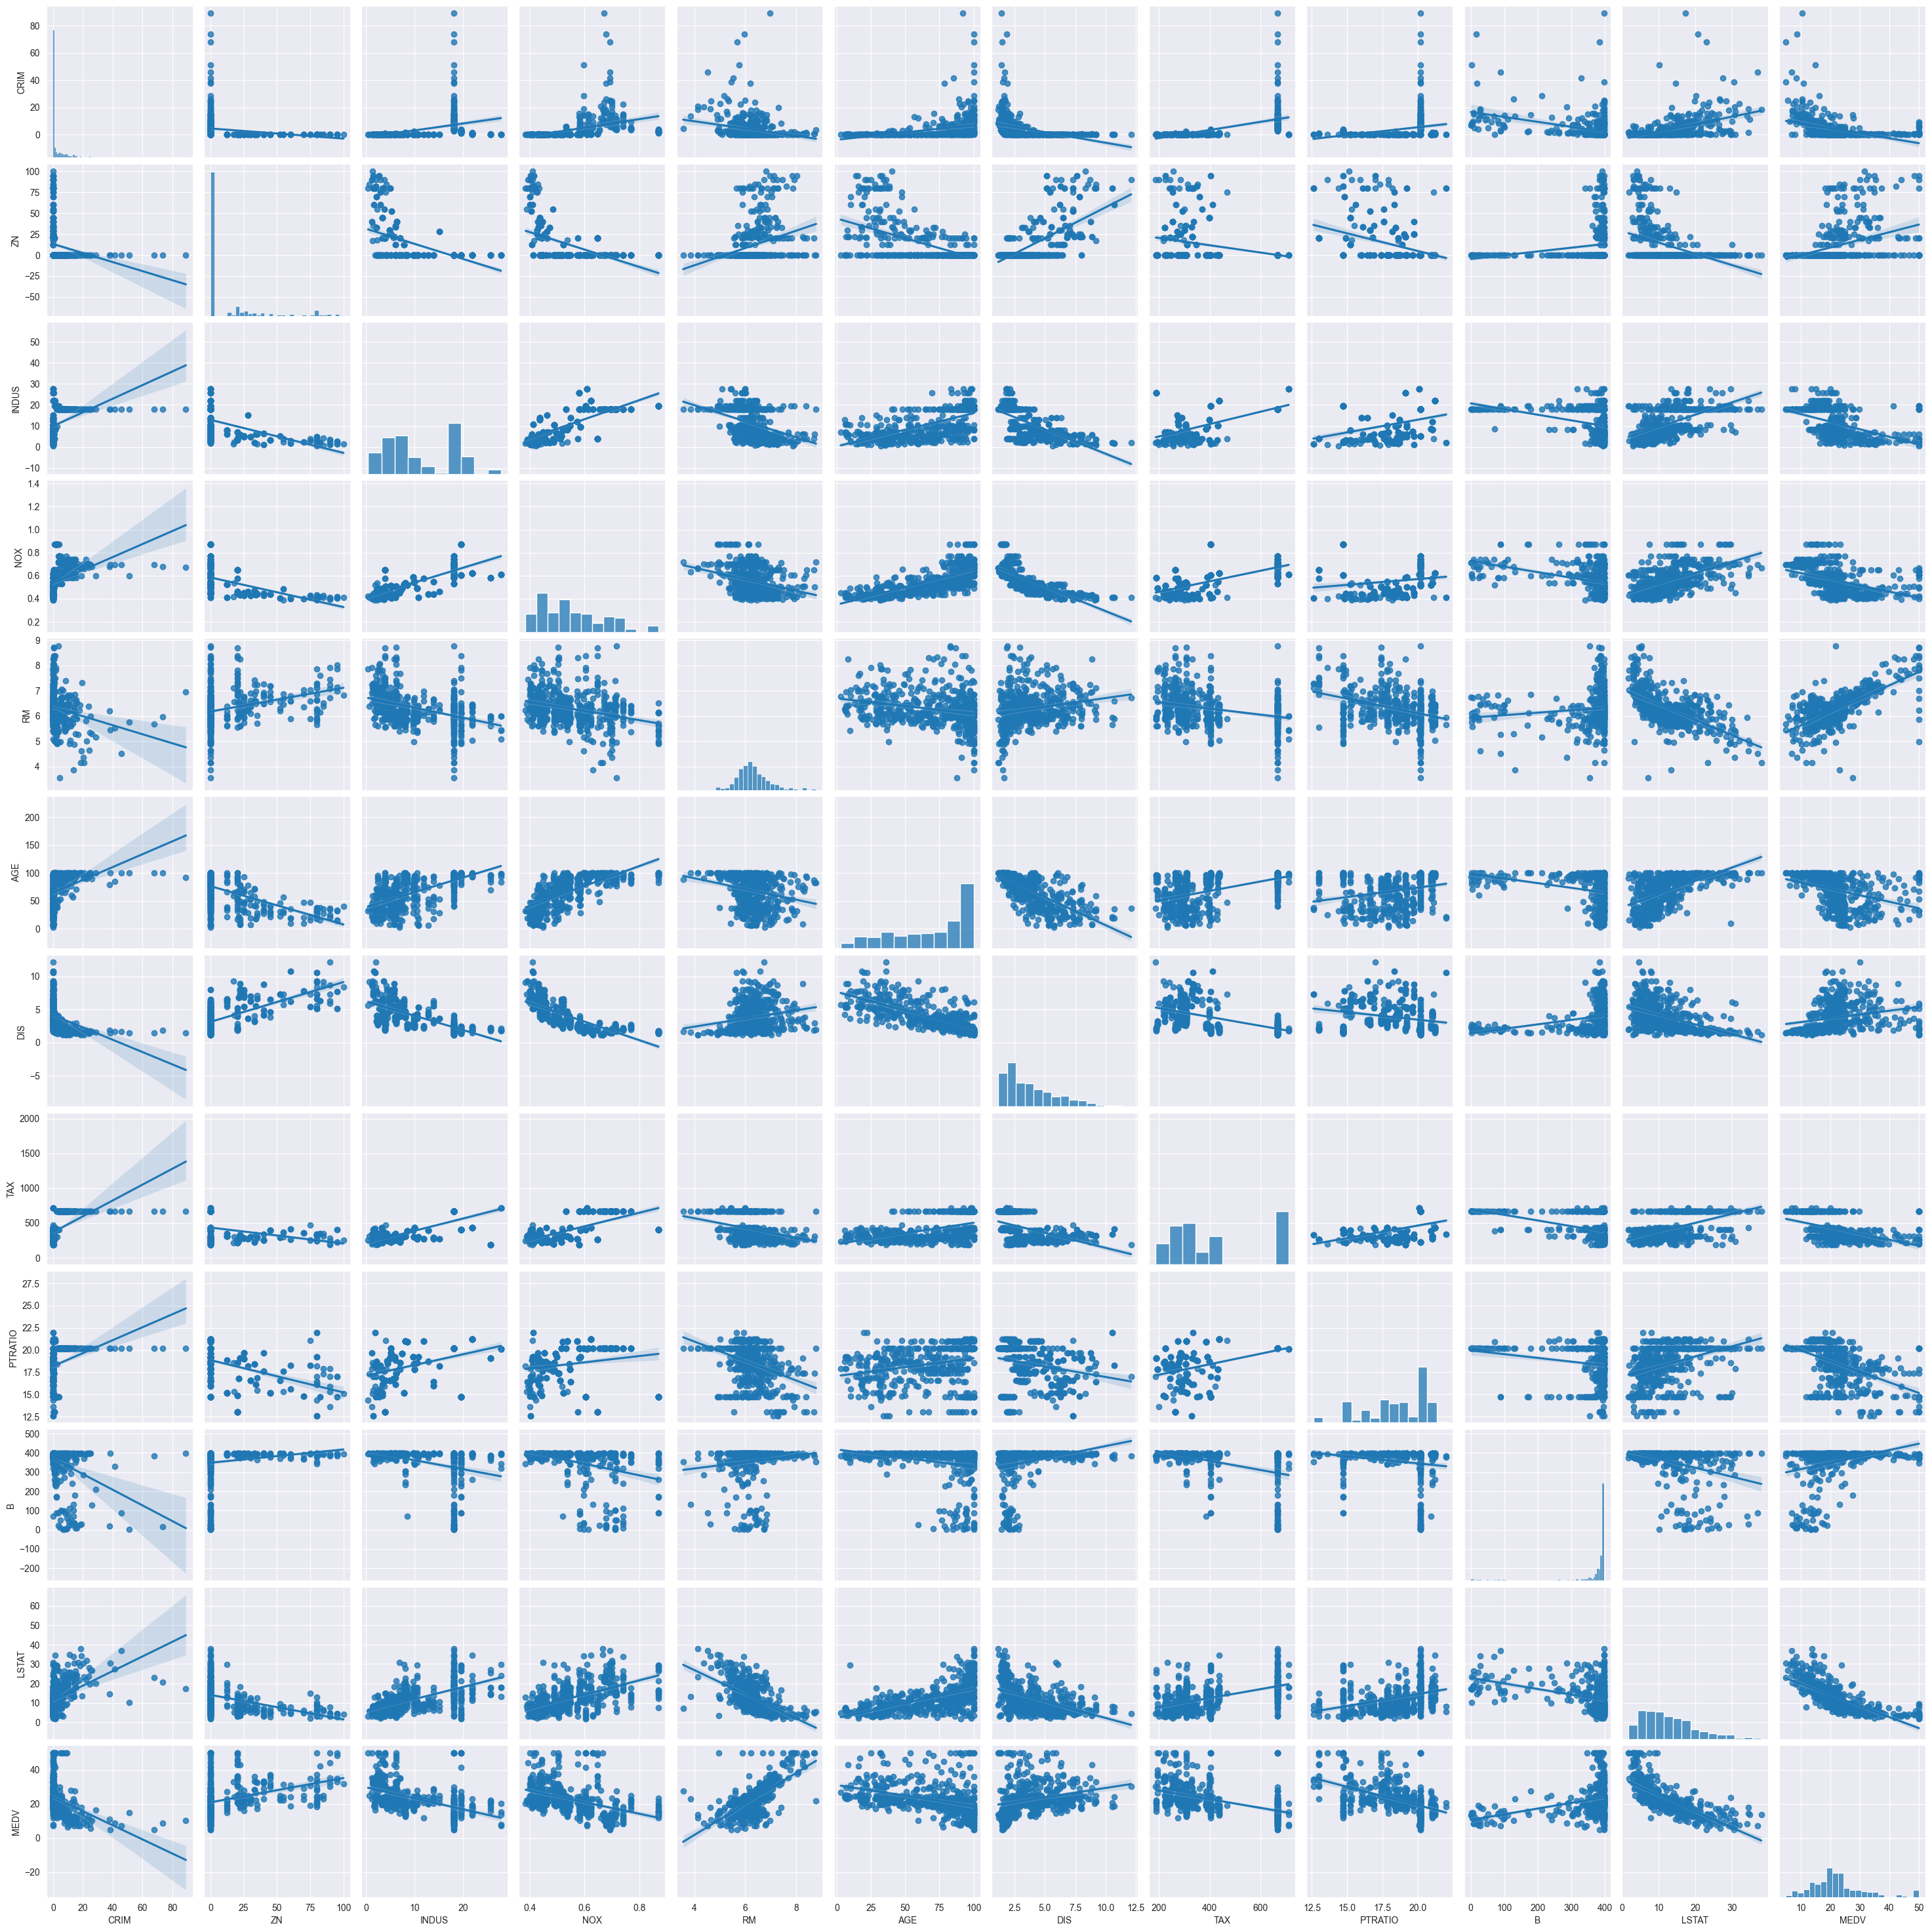

In [6]:
sns.pairplot(boston_df, kind="reg")

It looks like most of the data doesn't have any clear connection.

<Figure size 640x480 with 0 Axes>

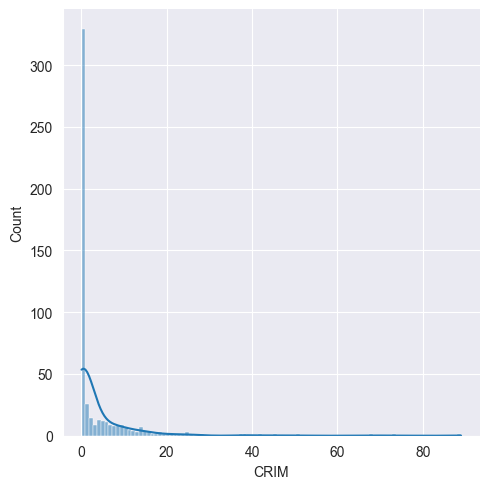

<Figure size 640x480 with 0 Axes>

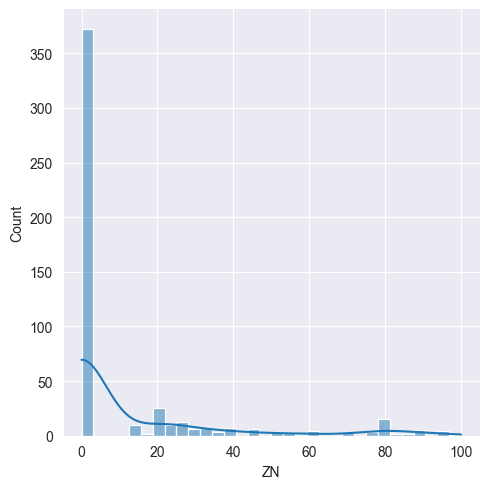

<Figure size 640x480 with 0 Axes>

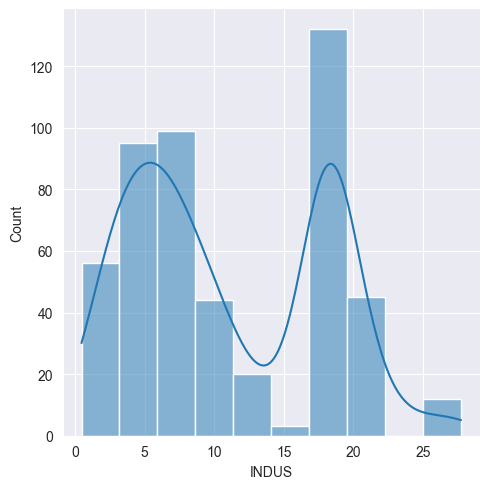

<Figure size 640x480 with 0 Axes>

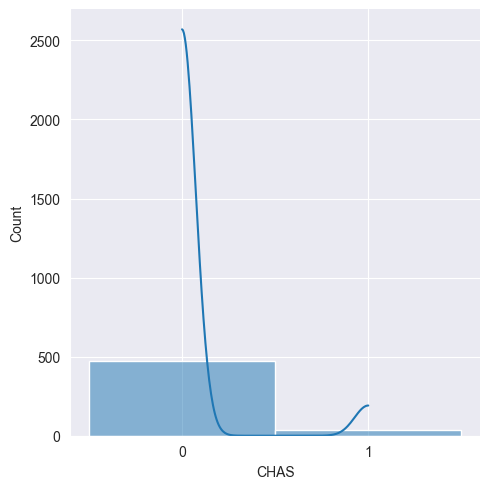

<Figure size 640x480 with 0 Axes>

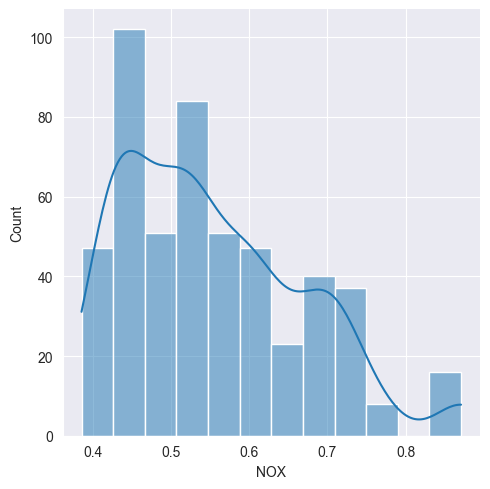

<Figure size 640x480 with 0 Axes>

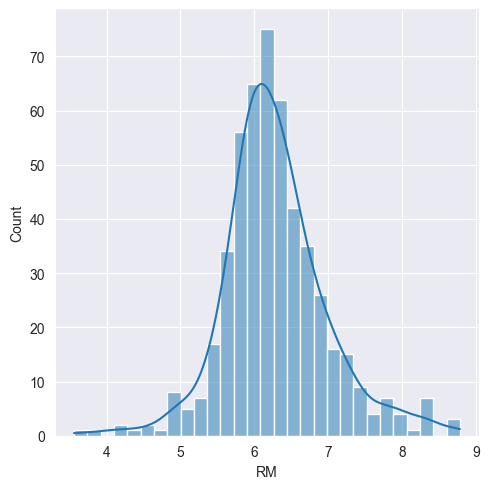

<Figure size 640x480 with 0 Axes>

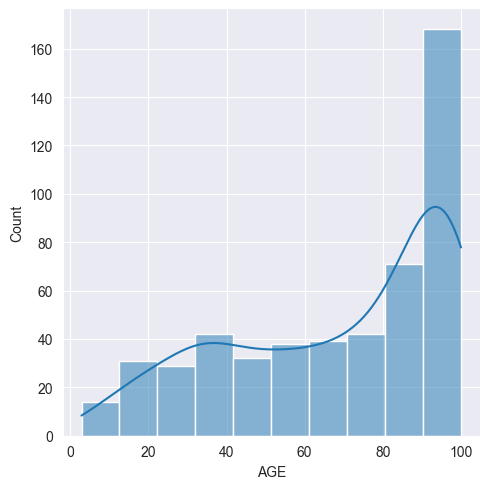

<Figure size 640x480 with 0 Axes>

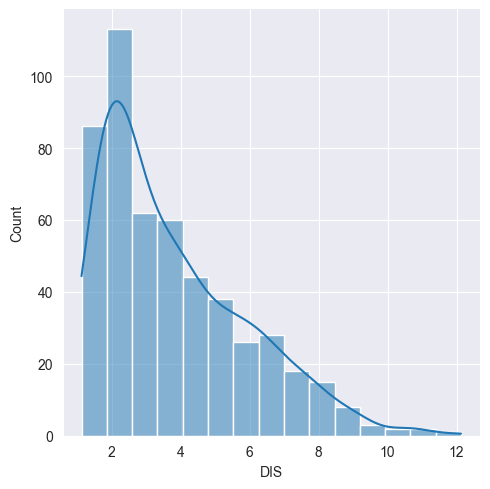

<Figure size 640x480 with 0 Axes>

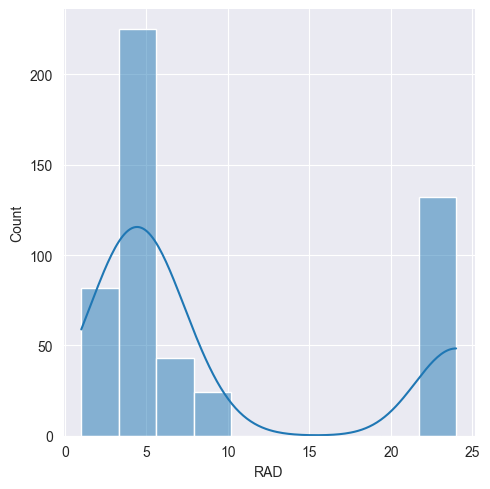

<Figure size 640x480 with 0 Axes>

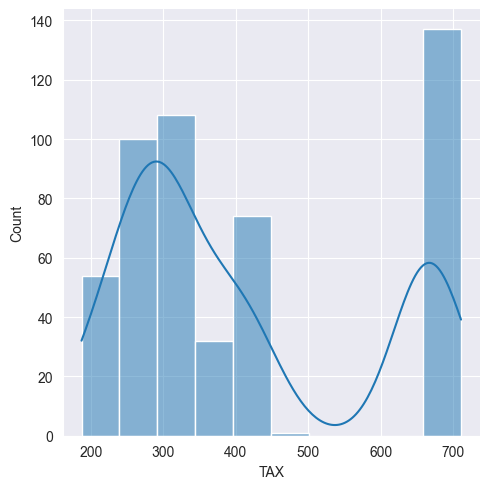

<Figure size 640x480 with 0 Axes>

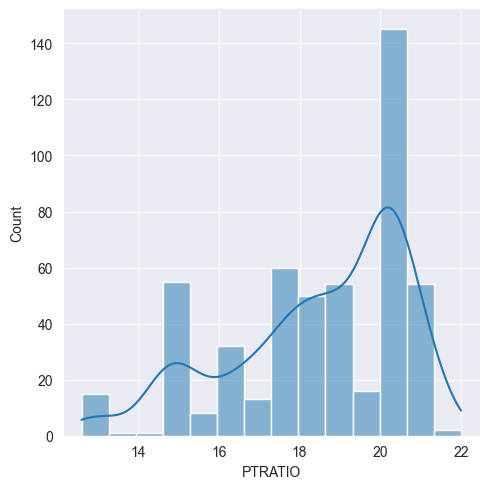

<Figure size 640x480 with 0 Axes>

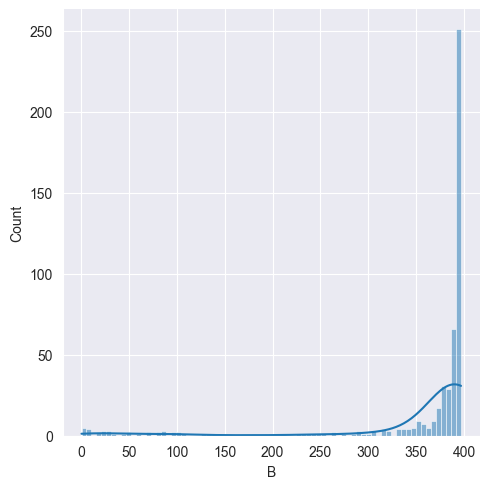

<Figure size 640x480 with 0 Axes>

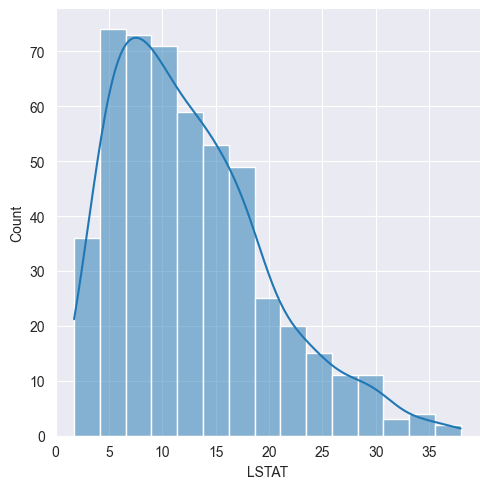

<Figure size 640x480 with 0 Axes>

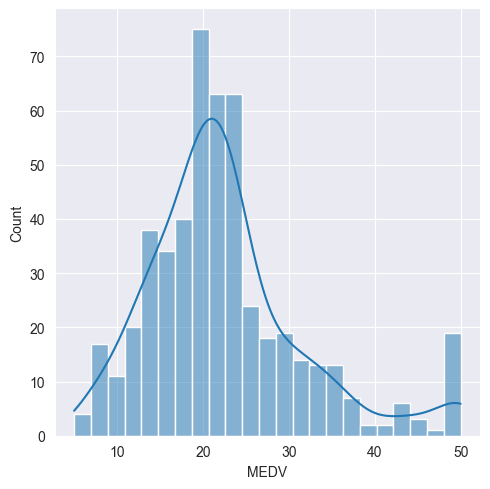

In [170]:
for column in boston_df.columns:
    plt.figure()
    sns.displot(boston_df[column], kde=True)
    plt.show()

In [86]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [87]:
pearson_correlation = boston_df.corr('pearson')["MEDV"].sort_values(ascending=False)
kendall_correlation = boston_df.corr('kendall')["MEDV"].sort_values(ascending=False)
spearman_correlation = boston_df.corr('spearman')["MEDV"].sort_values(ascending=False)

In [88]:
print(pearson_correlation)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [89]:
print(kendall_correlation)

MEDV       1.000000
RM         0.482829
ZN         0.339989
DIS        0.313115
B          0.126955
CHAS       0.115202
RAD       -0.248115
AGE       -0.387758
NOX       -0.394995
PTRATIO   -0.398789
CRIM      -0.403964
TAX       -0.414650
INDUS     -0.418430
LSTAT     -0.668656
Name: MEDV, dtype: float64


In [90]:
print(spearman_correlation)

MEDV       1.000000
RM         0.633576
DIS        0.445857
ZN         0.438179
B          0.185664
CHAS       0.140612
RAD       -0.346776
AGE       -0.547562
PTRATIO   -0.555905
CRIM      -0.558891
TAX       -0.562411
NOX       -0.562609
INDUS     -0.578255
LSTAT     -0.852914
Name: MEDV, dtype: float64


It looks like LSTAT has a pretty strong negative correlation across all kinds of correlations. LSTAT is the % of lower status of the population ( which I think means poor people). This makes sense because the higher the median of a owner-occupied home, the harder buying new homes becomes for poor people.

<Axes: xlabel='LSTAT', ylabel='MEDV'>

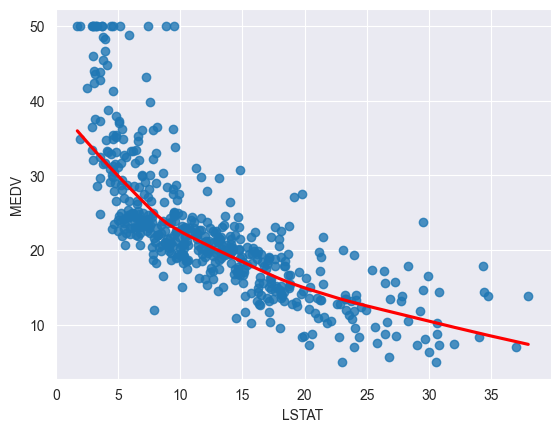

In [91]:
sns.regplot(data=boston_df, x="LSTAT", y="MEDV", lowess=True, line_kws={"color": "red"})

In [92]:
spearmanr(boston_df['LSTAT'], boston_df['MEDV'])

SignificanceResult(statistic=np.float64(-0.8529141394922163), pvalue=np.float64(2.221727524313283e-144))

In [93]:
boston_df.corr('pearson').unstack().sort_values(ascending=False).head(boston_df.columns.size+10)[boston_df.columns.size:]

RAD    TAX      0.910228
TAX    RAD      0.910228
INDUS  NOX      0.763651
NOX    INDUS    0.763651
       AGE      0.731470
AGE    NOX      0.731470
TAX    INDUS    0.720760
INDUS  TAX      0.720760
RM     MEDV     0.695360
MEDV   RM       0.695360
dtype: float64

In [94]:
boston_df.corr('kendall').unstack().sort_values(ascending=False).head(boston_df.columns.size+10)[boston_df.columns.size:]

INDUS  NOX      0.612030
NOX    INDUS    0.612030
CRIM   NOX      0.603361
NOX    CRIM     0.603361
       AGE      0.589608
AGE    NOX      0.589608
CRIM   RAD      0.563969
RAD    CRIM     0.563969
TAX    RAD      0.558107
RAD    TAX      0.558107
dtype: float64

In [95]:
boston_df.corr('spearman').unstack().sort_values(ascending=False).head(boston_df.columns.size+10)[boston_df.columns.size:]

NOX    CRIM     0.821465
CRIM   NOX      0.821465
NOX    AGE      0.795153
AGE    NOX      0.795153
NOX    INDUS    0.791189
INDUS  NOX      0.791189
       CRIM     0.735524
CRIM   INDUS    0.735524
       TAX      0.729045
TAX    CRIM     0.729045
dtype: float64

In [96]:
boston_df.corr('pearson').unstack().sort_values(ascending=True).head(30)

NOX      DIS       -0.769230
DIS      NOX       -0.769230
         AGE       -0.747881
AGE      DIS       -0.747881
LSTAT    MEDV      -0.737663
MEDV     LSTAT     -0.737663
INDUS    DIS       -0.708027
DIS      INDUS     -0.708027
RM       LSTAT     -0.613808
LSTAT    RM        -0.613808
ZN       AGE       -0.569537
AGE      ZN        -0.569537
TAX      DIS       -0.534432
DIS      TAX       -0.534432
INDUS    ZN        -0.533828
ZN       INDUS     -0.533828
         NOX       -0.516604
NOX      ZN        -0.516604
PTRATIO  MEDV      -0.507787
MEDV     PTRATIO   -0.507787
LSTAT    DIS       -0.496996
DIS      LSTAT     -0.496996
RAD      DIS       -0.494588
DIS      RAD       -0.494588
MEDV     INDUS     -0.483725
INDUS    MEDV      -0.483725
TAX      MEDV      -0.468536
MEDV     TAX       -0.468536
B        RAD       -0.444413
RAD      B         -0.444413
dtype: float64

In [97]:
boston_df.corr('kendall').unstack().sort_values(ascending=True).head(30)

NOX      DIS       -0.683930
DIS      NOX       -0.683930
LSTAT    MEDV      -0.668656
MEDV     LSTAT     -0.668656
AGE      DIS       -0.609836
DIS      AGE       -0.609836
         INDUS     -0.565137
INDUS    DIS       -0.565137
DIS      CRIM      -0.539878
CRIM     DIS       -0.539878
INDUS    ZN        -0.535468
ZN       INDUS     -0.535468
NOX      ZN        -0.511464
ZN       NOX       -0.511464
LSTAT    RM        -0.468231
RM       LSTAT     -0.468231
ZN       CRIM      -0.462057
CRIM     ZN        -0.462057
ZN       AGE       -0.429389
AGE      ZN        -0.429389
MEDV     INDUS     -0.418430
INDUS    MEDV      -0.418430
TAX      MEDV      -0.414650
MEDV     TAX       -0.414650
LSTAT    DIS       -0.409347
DIS      LSTAT     -0.409347
MEDV     CRIM      -0.403964
CRIM     MEDV      -0.403964
MEDV     PTRATIO   -0.398789
PTRATIO  MEDV      -0.398789
dtype: float64

In [98]:
boston_df.corr('spearman').unstack().sort_values(ascending=True).head(30)

DIS    NOX     -0.880015
NOX    DIS     -0.880015
MEDV   LSTAT   -0.852914
LSTAT  MEDV    -0.852914
AGE    DIS     -0.801610
DIS    AGE     -0.801610
       INDUS   -0.757080
INDUS  DIS     -0.757080
DIS    CRIM    -0.744986
CRIM   DIS     -0.744986
INDUS  ZN      -0.642811
ZN     INDUS   -0.642811
RM     LSTAT   -0.640832
LSTAT  RM      -0.640832
NOX    ZN      -0.634828
ZN     NOX     -0.634828
INDUS  MEDV    -0.578255
MEDV   INDUS   -0.578255
TAX    DIS     -0.574336
DIS    TAX     -0.574336
ZN     CRIM    -0.571660
CRIM   ZN      -0.571660
LSTAT  DIS     -0.564262
DIS    LSTAT   -0.564262
NOX    MEDV    -0.562609
MEDV   NOX     -0.562609
TAX    MEDV    -0.562411
MEDV   TAX     -0.562411
CRIM   MEDV    -0.558891
MEDV   CRIM    -0.558891
dtype: float64

<Axes: xlabel='NOX', ylabel='DIS'>

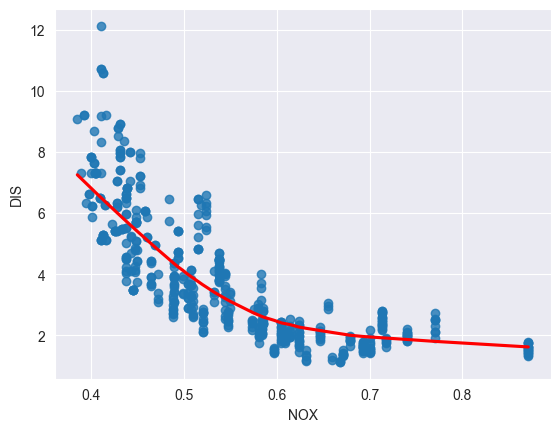

In [242]:
sns.regplot(data=boston_df, x="NOX", y="DIS", lowess=True, line_kws={"color": "red"})

In [144]:
boston_df['TAX'] = pd.to_numeric(boston_df['TAX'], errors='coerce')
boston_df['RAD'] = pd.to_numeric(boston_df['RAD'], errors='coerce')

In [145]:
pearsonr(boston_df['TAX'], boston_df['RAD'])

PearsonRResult(statistic=np.float64(0.9102281885331875), pvalue=np.float64(4.129920119396943e-195))

<Axes: xlabel='TAX', ylabel='RAD'>

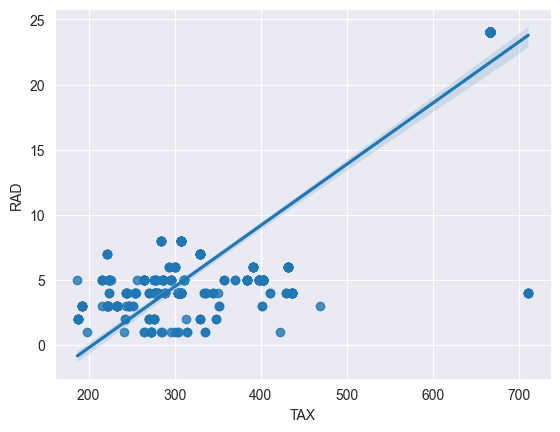

In [146]:
sns.regplot(data=boston_df, x="TAX", y="RAD")

In [147]:
boston_df['RAD'].sort_values(ascending=False)

409    24
398    24
404    24
403    24
402    24
       ..
255     1
254     1
194     1
193     1
505     1
Name: RAD, Length: 506, dtype: int64

In [148]:
tax_without_outliers = boston_df['TAX'][boston_df['TAX'] < 600]
rad_without_outliers = boston_df['RAD'][boston_df['RAD'] < 20]

In [149]:
pearsonr(tax_without_outliers, rad_without_outliers[:-5])

PearsonRResult(statistic=np.float64(0.21320614620972939), pvalue=np.float64(3.6397242057858204e-05))

<Axes: xlabel='tax', ylabel='rad'>

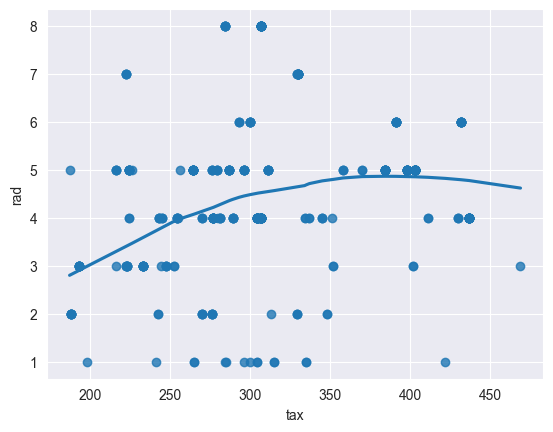

In [150]:
no_outliers_for_pearson = pd.DataFrame({'tax': tax_without_outliers, 'rad': rad_without_outliers[:-5]})

sns.regplot(data=no_outliers_for_pearson, x="tax", y="rad", lowess=True)

In [151]:
tax_with_outliers = boston_df['TAX'][boston_df['TAX'] > 600]
rad_with_outliers = boston_df['RAD'][boston_df['RAD'] > 20]

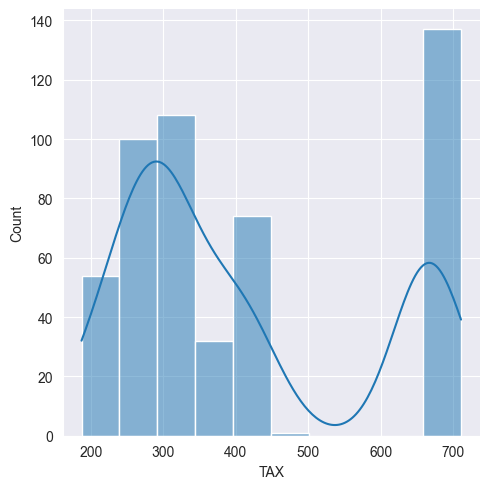

In [152]:
sns.displot(boston_df['TAX'], kde=True)

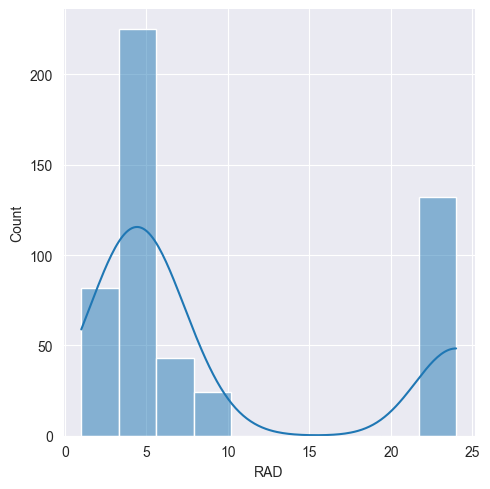

In [153]:
sns.displot(boston_df['RAD'], kde=True)

In [154]:
print(boston_df.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [205]:
def get_anomalies(column=None, distance_from_mean_threshold=3):
    all_anomalies_index = []

    for column in [column for column in boston_df.columns if column not in ["RAD", "CHAS"]] if not column else [column]:
        std = boston_df[column].std()
        mean = boston_df[column].mean()
        for index, value in boston_df[column].items():
            distance_from_mean = (value - mean) / std
            if distance_from_mean > distance_from_mean_threshold or distance_from_mean < -1*distance_from_mean_threshold:
                print(f"{column}: index: {index}, value: {value}, distance from mean: {distance_from_mean}")
                if value not in all_anomalies_index:
                    all_anomalies_index.append(value)

    print("Amount of anomalies: ", len(all_anomalies_index))

In [208]:
get_anomalies(distance_from_mean_threshold=3)

CRIM: index: 380, value: 88.9762, distance from mean: 9.924109610233579
CRIM: index: 398, value: 38.3518, distance from mean: 4.038608879833915
CRIM: index: 404, value: 41.5292, distance from mean: 4.4080076286738405
CRIM: index: 405, value: 67.9208, distance from mean: 7.476247075984144
CRIM: index: 410, value: 51.1358, distance from mean: 5.5248534839660985
CRIM: index: 414, value: 45.7461, distance from mean: 4.898256758145445
CRIM: index: 418, value: 73.5341, distance from mean: 8.12883913139522
CRIM: index: 427, value: 37.6619, distance from mean: 3.958402359778316
ZN: index: 55, value: 90.0, distance from mean: 3.3717020956096238
ZN: index: 56, value: 85.0, distance from mean: 3.1573164132298213
ZN: index: 57, value: 100.0, distance from mean: 3.800473460369229
ZN: index: 199, value: 95.0, distance from mean: 3.5860877779894267
ZN: index: 200, value: 95.0, distance from mean: 3.5860877779894267
ZN: index: 201, value: 82.5, distance from mean: 3.05012357203992
ZN: index: 202, valu

In [181]:
print(boston_df['CRIM'].sort_values(ascending=False)[:20])

380    88.9762
418    73.5341
405    67.9208
410    51.1358
414    45.7461
404    41.5292
398    38.3518
427    37.6619
413    28.6558
417    25.9406
400    25.0461
403    24.8017
386    24.3938
378    23.6482
387    22.5971
440    22.0511
406    20.7162
384    20.0849
375    19.6091
412    18.8110
Name: CRIM, dtype: float64


In [185]:
print(boston_df.iloc[380])

CRIM       88.9762
ZN             0.0
INDUS         18.1
CHAS             0
NOX          0.671
RM           6.968
AGE           91.9
DIS         1.4165
RAD             24
TAX          666.0
PTRATIO       20.2
B            396.9
LSTAT        17.21
MEDV          10.4
Name: 380, dtype: object


In [186]:
boston_df['MEDV'].sort_values()

398     5.0
405     5.0
400     5.6
399     6.3
414     7.0
       ... 
166    50.0
195    50.0
283    50.0
225    50.0
186    50.0
Name: MEDV, Length: 506, dtype: float64

Training:

In [278]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
boston_df = boston.frame

boston_df['CHAS'] = pd.to_numeric(boston_df['CHAS'], errors='coerce')
boston_df['RAD'] = pd.to_numeric(boston_df['RAD'], errors='coerce')

Y = boston_df['MEDV']
X = boston_df.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

base_model = LinearRegression()
base_model.fit(X_train, y_train)

# Intercept
print("Intercept:", base_model.intercept_)

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": base_model.coef_
})
print(coefficients)

y_pred = base_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Intercept: 38.09169492630251
    Feature  Coefficient
0      CRIM    -0.119443
1        ZN     0.044780
2     INDUS     0.005485
3      CHAS     2.340804
4       NOX   -16.123604
5        RM     3.708709
6       AGE    -0.003121
7       DIS    -1.386397
8       RAD     0.244178
9       TAX    -0.010990
10  PTRATIO    -1.045921
11        B     0.008110
12    LSTAT    -0.492793
R2 Score: 0.5892223849182527
MSE: 33.448979997676375


In [225]:
scaler = MinMaxScaler()

boston_df_unprocessed_scaled = scaler.fit_transform(boston_df)

boston_df_unprocessed_scaled = pd.DataFrame(boston_df_unprocessed_scaled, columns=boston_df.columns, index=boston_df.index)

In [226]:
Y = boston_df_unprocessed_scaled['MEDV']
X = boston_df_unprocessed_scaled.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

base_model = LinearRegression()
base_model.fit(X_train, y_train)

# Intercept
print("Intercept:", base_model.intercept_)

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": base_model.coef_
})
print(coefficients)

y_pred = base_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Intercept: 0.41456394812938135
    Feature  Coefficient
0      CRIM    -0.223524
1        ZN     0.066912
2     INDUS     0.024480
3      CHAS     0.061876
4       NOX    -0.185788
5        RM     0.514806
6       AGE    -0.013586
7       DIS    -0.353823
8       RAD     0.134131
9       TAX    -0.123976
10  PTRATIO    -0.191229
11        B     0.108851
12    LSTAT    -0.409570
R² Score: 0.6687594935356318
MSE: 0.011995614555542478


Improving the model:

In [227]:
boston_df_processed = boston_df.copy()

In [228]:
all_rad_values_ordered = list(set(boston_df_processed["RAD"].sort_values(ascending=False)))
rad_threshold = (all_rad_values_ordered[-1] + all_rad_values_ordered[-2])/2
boston_df_processed["SMALL_RAD"] = boston_df_processed["RAD"].where(boston_df_processed["RAD"] <= rad_threshold, other=0)
boston_df_processed["BIG_RAD"] = boston_df_processed["RAD"].where(boston_df_processed["RAD"] > rad_threshold, other=0)
boston_df_processed.drop(columns=["RAD"], inplace=True)

In [229]:
boston_df_processed["TAX"].value_counts()

TAX
666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
285.0      1
198.0      1
256.0      1
244.0      1
313.0      1
Name: count, Length: 66, dtype: int64

In [230]:
tax_threshold = 600 #look at distribution for explanation
boston_df_processed["SMALL_TAX"] = boston_df_processed["TAX"].where(boston_df_processed["TAX"] <= tax_threshold, other=0)
boston_df_processed["BIG_TAX"] = boston_df_processed["TAX"].where(boston_df_processed["TAX"] > tax_threshold, other=0)
boston_df_processed.drop(columns=["TAX"], inplace=True)

In [231]:
boston_df_processed["ZN"].value_counts()

ZN
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

In [232]:
zn_threshold = 1 #look at distribution for explanation
boston_df_processed["SMALL_ZN"] = boston_df_processed["ZN"].where(boston_df_processed["ZN"] <= zn_threshold, other=0)
boston_df_processed["BIG_ZN"] = boston_df_processed["ZN"].where(boston_df_processed["ZN"] > zn_threshold, other=0)
boston_df_processed.drop(columns=["ZN"], inplace=True)

In [233]:
boston_df_processed["CRIM"].value_counts()

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64

In [234]:
crim_threshold = 1 #look at distribution for explanation
boston_df_processed["NO_CRIM"] = boston_df_processed["CRIM"].where(boston_df_processed["CRIM"] <= crim_threshold, other=0)
boston_df_processed["SOME_CRIM"] = boston_df_processed["CRIM"].where(boston_df_processed["CRIM"] > crim_threshold, other=0)
boston_df_processed.drop(columns=["CRIM"], inplace=True)

In [235]:
# scaler = StandardScaler()
#
# boston_df_scaled = scaler.fit_transform(boston_df_processed)
#
# boston_df_scaled = pd.DataFrame(boston_df_scaled, columns=boston_df_processed.columns, index=boston_df_processed.index)

In [236]:
Y = boston_df_processed['MEDV']
X = boston_df_processed.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

improved_model = LinearRegression()
improved_model.fit(X_train, y_train)
print("Intercept:", improved_model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": improved_model.coef_
})
print(coefficients)

y_pred = improved_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

errors = (y_test - y_pred) ** 2

results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred
results_df['Squared_Error'] = errors

print("\nTop 5 samples with largest MSE errors:")
print(top_errors[['Actual', 'Predicted', 'Squared_Error']])

Intercept: 30.948342422748762
      Feature   Coefficient
0       INDUS  3.551810e-02
1        CHAS  2.776751e+00
2         NOX -1.634153e+01
3          RM  4.374372e+00
4         AGE -7.385879e-03
5         DIS -1.443817e+00
6     PTRATIO -9.244989e-01
7           B  1.207242e-02
8       LSTAT -5.138634e-01
9   SMALL_RAD  3.469030e-01
10    BIG_RAD  1.469820e-01
11  SMALL_TAX -1.340723e-02
12    BIG_TAX -7.109181e-03
13   SMALL_ZN  1.421085e-14
14     BIG_ZN  3.260734e-02
15    NO_CRIM  4.548364e-01
16  SOME_CRIM -1.105863e-01
R² Score: 0.6685104839882104
MSE: 24.309380287128977

Top 5 samples with largest MSE errors:
     Actual  Predicted  Squared_Error
371    50.0  24.664467     641.889233
412    17.9  -0.178395     326.828351
365    27.5  12.694296     219.208869
414     7.0  -5.976347     168.385570
375    15.0  25.826962     117.223109


In [237]:
boston_df_processed["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [238]:
scaler = MinMaxScaler()

boston_df_scaled = scaler.fit_transform(boston_df_processed)

boston_df_scaled = pd.DataFrame(boston_df_scaled, columns=boston_df_processed.columns, index=boston_df_processed.index)

In [239]:
Y = boston_df_scaled['MEDV']
X = boston_df_scaled.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

improved_model = LinearRegression()
improved_model.fit(X_train, y_train)
print("Intercept:", improved_model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": improved_model.coef_
})
print(coefficients)

y_pred = improved_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

errors = (y_test - y_pred) ** 2

results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred
results_df['Squared_Error'] = errors

print("\nTop 5 samples with largest MSE errors:")
print(top_errors[['Actual', 'Predicted', 'Squared_Error']])

Intercept: 0.46809268035110685
      Feature   Coefficient
0       INDUS  2.153186e-02
1        CHAS  6.170558e-02
2         NOX -1.764885e-01
3          RM  5.073300e-01
4         AGE -1.593709e-02
5         DIS -3.528336e-01
6     PTRATIO -1.931175e-01
7           B  1.063929e-01
8       LSTAT -4.138313e-01
9   SMALL_RAD  6.167164e-02
10    BIG_RAD  7.839039e-02
11  SMALL_TAX -1.397332e-01
12    BIG_TAX -1.123251e-01
13   SMALL_ZN -2.942091e-15
14     BIG_ZN  7.246075e-02
15    NO_CRIM  9.990533e-03
16  SOME_CRIM -2.186566e-01
R² Score: 0.6685104839882158
MSE: 0.012004632240557324

Top 5 samples with largest MSE errors:
     Actual  Predicted  Squared_Error
371    50.0  24.664467     641.889233
412    17.9  -0.178395     326.828351
365    27.5  12.694296     219.208869
414     7.0  -5.976347     168.385570
375    15.0  25.826962     117.223109


In [240]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_train_pred_cv = cross_val_predict(improved_model, X_train, y_train, cv=kf)


improved_model.fit(X_train, y_train)
print("Intercept:", improved_model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": improved_model.coef_
})
print(coefficients)

y_pred = improved_model.predict(X_test)

print("R² Score (Cross-Validated):", r2_score(y_train, y_train_pred_cv))
print("MSE (Cross-Validated):", mean_squared_error(y_train, y_train_pred_cv))


Intercept: 0.46809268035110685
      Feature   Coefficient
0       INDUS  2.153186e-02
1        CHAS  6.170558e-02
2         NOX -1.764885e-01
3          RM  5.073300e-01
4         AGE -1.593709e-02
5         DIS -3.528336e-01
6     PTRATIO -1.931175e-01
7           B  1.063929e-01
8       LSTAT -4.138313e-01
9   SMALL_RAD  6.167164e-02
10    BIG_RAD  7.839039e-02
11  SMALL_TAX -1.397332e-01
12    BIG_TAX -1.123251e-01
13   SMALL_ZN -2.942091e-15
14     BIG_ZN  7.246075e-02
15    NO_CRIM  9.990533e-03
16  SOME_CRIM -2.186566e-01
R² Score (Cross-Validated): 0.7163470823755669
MSE (Cross-Validated): 0.01216883677095507


Only LSTAT:

In [241]:
Y = boston_df_processed['MEDV']
X = pd.DataFrame(boston_df_processed["LSTAT"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

improved_model = LinearRegression()
improved_model.fit(X_train, y_train)
print("Intercept:", improved_model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": improved_model.coef_
})
print(coefficients)

y_pred = improved_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Intercept: 34.8369498203185
  Feature  Coefficient
0   LSTAT    -0.966531
R² Score: 0.5429180422970386
MSE: 33.51954917268488


In [242]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

Y = boston_df_scaled['MEDV']
X = boston_df_scaled.drop(['MEDV'], axis=1)

lr = LinearRegression()

# Exhaustive feature selector: tries all subsets up to max_features
efs = ExhaustiveFeatureSelector(lr, min_features=1, max_features=4,scoring='neg_mean_squared_error',
                                print_progress=True,
                                cv=5)

efs = efs.fit(X, Y)

Features: 3213/3213

In [243]:
print('Best subset:', efs.best_feature_names_)
print("Best MSE score:", -1*efs.best_score_)

Best subset: ('NOX', 'DIS', 'PTRATIO', 'LSTAT')
Best MSE score: 0.016524932347243285


In [244]:
metric_dict = efs.get_metric_dict()
best_subsets = {}

for key, val in metric_dict.items():
    k = len(val['feature_idx'])
    if k not in best_subsets or val['avg_score'] > best_subsets[k]['score']:
        best_subsets[k] = {
            'score': val['avg_score'],
            'features': val['feature_names']
        }

for k in sorted(best_subsets):
    print(f"{k} feature(s): R² = {best_subsets[k]['score']:.4f} with {best_subsets[k]['features']}")


1 feature(s): R² = -0.0210 with ('LSTAT',)
2 feature(s): R² = -0.0178 with ('PTRATIO', 'LSTAT')
3 feature(s): R² = -0.0168 with ('RM', 'PTRATIO', 'LSTAT')
4 feature(s): R² = -0.0165 with ('NOX', 'DIS', 'PTRATIO', 'LSTAT')


In [245]:
from mlxtend.feature_selection import SequentialFeatureSelector

Y = boston_df_processed['MEDV']
X = boston_df_processed.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

MSE_scores = []

lr = LinearRegression()

for i in range(X_train.columns.size):
    sfs_forward = SequentialFeatureSelector(lr,
                                            k_features=i+1,
                                            forward=True,
                                            floating=False,
                                            scoring='neg_mean_squared_error',
                                            cv=5,
                                            n_jobs=-1,
                                            verbose=0)

    sfs_forward = sfs_forward.fit(X, Y)

    MSE_scores.append(-1*sfs_forward.k_score_)

    print(f"{i} \nSequential Forward Selection (SFS) Best Features (indices): {sfs_forward.k_feature_idx_}")
    print(f"{i} Sequential Forward Selection (SFS) Best Features (names): {sfs_forward.k_feature_names_}")
    print(f"{i} Sequential Forward Selection (SFS) Best MSE Score: {-1*sfs_forward.k_score_:.4f}")




0 
Sequential Forward Selection (SFS) Best Features (indices): (8,)
0 Sequential Forward Selection (SFS) Best Features (names): ('LSTAT',)
0 Sequential Forward Selection (SFS) Best MSE Score: 42.6185
1 
Sequential Forward Selection (SFS) Best Features (indices): (6, 8)
1 Sequential Forward Selection (SFS) Best Features (names): ('PTRATIO', 'LSTAT')
1 Sequential Forward Selection (SFS) Best MSE Score: 36.0651
2 
Sequential Forward Selection (SFS) Best Features (indices): (3, 6, 8)
2 Sequential Forward Selection (SFS) Best Features (names): ('RM', 'PTRATIO', 'LSTAT')
2 Sequential Forward Selection (SFS) Best MSE Score: 34.1001
3 
Sequential Forward Selection (SFS) Best Features (indices): (1, 3, 6, 8)
3 Sequential Forward Selection (SFS) Best Features (names): ('CHAS', 'RM', 'PTRATIO', 'LSTAT')
3 Sequential Forward Selection (SFS) Best MSE Score: 33.7681
4 
Sequential Forward Selection (SFS) Best Features (indices): (1, 3, 6, 8, 16)
4 Sequential Forward Selection (SFS) Best Features (nam

<Axes: >

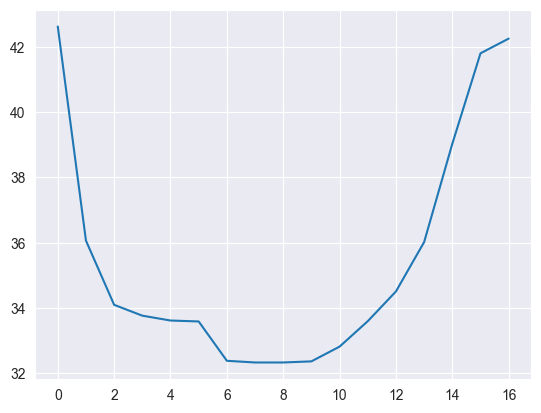

In [246]:
sns.lineplot(MSE_scores)

In [247]:
from mlxtend.feature_selection import SequentialFeatureSelector

Y = boston_df_processed['MEDV']
X = boston_df_processed.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

MSE_scores = []

lr = LinearRegression()

for i in range(X_train.columns.size):
    sfs_forward = SequentialFeatureSelector(lr,
                                            k_features=i+1,
                                            forward=False,
                                            floating=False,
                                            scoring='neg_mean_squared_error',
                                            cv=5,
                                            n_jobs=-1,
                                            verbose=0)

    sfs_forward = sfs_forward.fit(X, Y)

    MSE_scores.append(-1*sfs_forward.k_score_)

    print(f"{i} \nSequential Backward Selection (SFS) Best Features (indices): {sfs_forward.k_feature_idx_}")
    print(f"{i} Sequential Backward Selection (SFS) Best Features (names): {sfs_forward.k_feature_names_}")
    print(f"{i} Sequential Backward Selection (SFS) Best MSE Score: {-1*sfs_forward.k_score_:.4f}")




0 
Sequential Backward Selection (SFS) Best Features (indices): (8,)
0 Sequential Backward Selection (SFS) Best Features (names): ('LSTAT',)
0 Sequential Backward Selection (SFS) Best MSE Score: 42.6185
1 
Sequential Backward Selection (SFS) Best Features (indices): (6, 8)
1 Sequential Backward Selection (SFS) Best Features (names): ('PTRATIO', 'LSTAT')
1 Sequential Backward Selection (SFS) Best MSE Score: 36.0651
2 
Sequential Backward Selection (SFS) Best Features (indices): (5, 6, 8)
2 Sequential Backward Selection (SFS) Best Features (names): ('DIS', 'PTRATIO', 'LSTAT')
2 Sequential Backward Selection (SFS) Best MSE Score: 35.4992
3 
Sequential Backward Selection (SFS) Best Features (indices): (2, 5, 6, 8)
3 Sequential Backward Selection (SFS) Best Features (names): ('NOX', 'DIS', 'PTRATIO', 'LSTAT')
3 Sequential Backward Selection (SFS) Best MSE Score: 33.4630
4 
Sequential Backward Selection (SFS) Best Features (indices): (2, 5, 6, 8, 11)
4 Sequential Backward Selection (SFS) Bes

<Axes: >

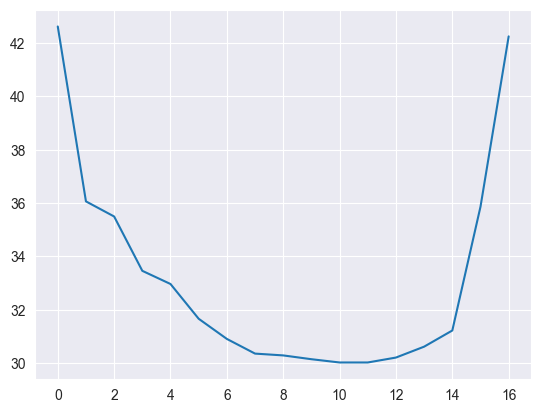

In [248]:
sns.lineplot(MSE_scores)

In [249]:
scaler = MinMaxScaler()

boston_df_min_max_scaled = scaler.fit_transform(boston_df_processed)

boston_df_min_max_scaled = pd.DataFrame(boston_df_min_max_scaled, columns=boston_df_processed.columns, index=boston_df_processed.index)

In [250]:
Y = boston_df_min_max_scaled['MEDV']
X = boston_df_min_max_scaled.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

improved_model = LinearRegression()
improved_model.fit(X_train, y_train)
print("Intercept:", improved_model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": improved_model.coef_
})
print(coefficients)

y_pred = improved_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

errors = (y_test - y_pred) ** 2

results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred
results_df['Squared_Error'] = errors

Intercept: 0.46809268035110685
      Feature   Coefficient
0       INDUS  2.153186e-02
1        CHAS  6.170558e-02
2         NOX -1.764885e-01
3          RM  5.073300e-01
4         AGE -1.593709e-02
5         DIS -3.528336e-01
6     PTRATIO -1.931175e-01
7           B  1.063929e-01
8       LSTAT -4.138313e-01
9   SMALL_RAD  6.167164e-02
10    BIG_RAD  7.839039e-02
11  SMALL_TAX -1.397332e-01
12    BIG_TAX -1.123251e-01
13   SMALL_ZN -2.942091e-15
14     BIG_ZN  7.246075e-02
15    NO_CRIM  9.990533e-03
16  SOME_CRIM -2.186566e-01
R² Score: 0.6685104839882158
MSE: 0.012004632240557324


In [260]:
def min_to_median(y_pred, median):
    y_pred_no_negatives = y_pred.copy()
    for i, value in enumerate(y_pred):
        if value<0:
            y_pred_no_negatives[i] =median

    return y_pred_no_negatives

In [282]:
Y = boston_df_processed['MEDV']
X = pd.DataFrame(boston_df_processed["LSTAT"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge = Ridge()
param_grid_ridge = {'alpha': np.logspace(-3, 3, 20)}
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_poly, y_train)

best_ridge_model = ridge_cv.best_estimator_

median = Y.median()

y_pred = best_ridge_model.predict(X_test_poly)
y_pred= min_to_median(y_pred, median)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best Params:", ridge_cv.best_params_)
print("Test MSE (Ridge, Polynomial):", mse)
print("Test R2 (Ridge, Polynomial):", r2)

lasso = Lasso(max_iter=10000)
param_grid_lasso = {'alpha': np.logspace(-3, 1, 20)}
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_poly, y_train)
y_pred= min_to_median(lasso_cv.predict(X_test_poly), median)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

print("Test MSE (Lasso, Polynomial):", lasso_mse)
print("Test R2 (Lasso, Polynomial):", lasso_r2)


Best Params: {'alpha': 0.004281332398719396}
Test MSE (Ridge, Polynomial): 27.319110958754546
Test R2 (Ridge, Polynomial): 0.6274689538513338
Test MSE (Lasso, Polynomial): 27.303443716380375
Test R2 (Lasso, Polynomial): 0.6276825967550406


In [283]:
Y = boston_df['MEDV']
X = pd.DataFrame(boston_df["LSTAT"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge = Ridge()
param_grid_ridge = {'alpha': np.logspace(-3, 3, 20)}
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_poly, y_train)

best_ridge_model = ridge_cv.best_estimator_

y_pred = best_ridge_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best Ridge alpha:", ridge_cv.best_params_)
print("Test MSE (Ridge, Polynomial):", mse)
print("Test R2 (Ridge, Polynomial):", r2)

lasso = Lasso(max_iter=10000)
param_grid_lasso = {'alpha': np.logspace(-3, 1, 20)}
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_poly, y_train)
lasso_mse = mean_squared_error(y_test, lasso_cv.predict(X_test_poly))
lasso_r2 = r2_score(y_test, y_pred)

print("Test MSE (Lasso, Polynomial):", lasso_mse)
print("Test R2 (Lasso, Polynomial):", lasso_r2)


Best Ridge alpha: {'alpha': 0.001}
Test MSE (Ridge, Polynomial): 24.571307589665434
Test R2 (Ridge, Polynomial): 0.6649387699534411
Test MSE (Lasso, Polynomial): 24.84643548543118
Test R2 (Lasso, Polynomial): 0.6649387699534411


In [276]:
Y = boston_df_processed['MEDV']
X = pd.DataFrame(boston_df_processed["LSTAT"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge = Ridge()
param_grid_ridge = {'alpha': np.logspace(-3, 3, 20)}
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_poly, y_train)

best_ridge_model = ridge_cv.best_estimator_

y_pred = best_ridge_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print("Best Ridge alpha:", ridge_cv.best_params_)
print("Test MSE (Ridge, Polynomial):", mse)

lasso = Lasso(max_iter=10000)
param_grid_lasso = {'alpha': np.logspace(-3, 1, 20)}
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_poly, y_train)
lasso_mse = mean_squared_error(y_test, lasso_cv.predict(X_test_poly))
print("Test MSE (Lasso, Polynomial):", lasso_mse)


Best Ridge alpha: {'alpha': 0.004281332398719396}
Test MSE (Ridge, Polynomial): 27.319110958754546
Test MSE (Lasso, Polynomial): 27.303443716380375
